### 광고

In [39]:
# %autosave 0 
import warnings
warnings.filterwarnings(action='ignore') 

import numpy as np
import tensorflow as tf

from tensorflow.keras.models import Sequential  # class
from tensorflow.keras.models import load_model  # model 파일 로딩
from tensorflow.keras.layers import Dense       # 전결합층
from tensorflow.keras.optimizers import Adam    # 가중치, bias 최적화
from tensorflow.keras.utils import plot_model   # 네트워크 입출력 시각화

import matplotlib.pyplot as plt
import matplotlib
from matplotlib import rc
rc('font', family='Malgun Gothic')

# print(tf.__version__)

In [40]:
data = np.loadtxt('./data/click.csv', skiprows=1, delimiter=',')
print(type(data))
print(data.shape)
print(data)

<class 'numpy.ndarray'>
(20, 2)
[[235. 591.]
 [216. 539.]
 [148. 413.]
 [ 35. 310.]
 [ 85. 308.]
 [204. 519.]
 [ 49. 325.]
 [ 25. 332.]
 [173. 498.]
 [191. 498.]
 [134. 392.]
 [ 99. 334.]
 [117. 385.]
 [112. 387.]
 [162. 425.]
 [272. 659.]
 [159. 400.]
 [159. 427.]
 [ 59. 319.]
 [198. 522.]]


In [41]:
x_train = data[:, 0]
print(x_train)

[235. 216. 148.  35.  85. 204.  49.  25. 173. 191. 134.  99. 117. 112.
 162. 272. 159. 159.  59. 198.]


In [42]:
y_train = data[:, 1]
print(y_train)

[591. 539. 413. 310. 308. 519. 325. 332. 498. 498. 392. 334. 385. 387.
 425. 659. 400. 427. 319. 522.]


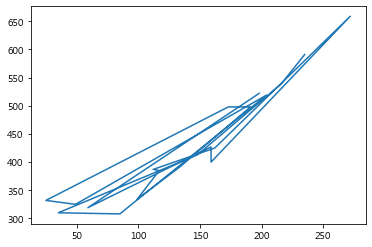

In [43]:
plt.plot(x_train, y_train)
plt.show()

In [44]:
data[:,0]

array([235., 216., 148.,  35.,  85., 204.,  49.,  25., 173., 191., 134.,
        99., 117., 112., 162., 272., 159., 159.,  59., 198.])

In [45]:
idx = data[:,0].argsort() # 원본 데이터의 값이 정렬이 되도록 생성된 index, 0 ~
idx

array([ 7,  3,  6, 18,  4, 11, 13, 12, 10,  2, 17, 16, 14,  8,  9, 19,  5,
        1,  0, 15], dtype=int64)

In [46]:
print(data[7, :]) # 원본 데이터 index 7임으로 8번째 값
print(data[3, :]) # 원본 데이터 index 3임으로 4번째 값
print(data[6, :]) # 원본 데이터 index 6임으로 7번째 값
print(data)

[ 25. 332.]
[ 35. 310.]
[ 49. 325.]
[[235. 591.]
 [216. 539.]
 [148. 413.]
 [ 35. 310.]
 [ 85. 308.]
 [204. 519.]
 [ 49. 325.]
 [ 25. 332.]
 [173. 498.]
 [191. 498.]
 [134. 392.]
 [ 99. 334.]
 [117. 385.]
 [112. 387.]
 [162. 425.]
 [272. 659.]
 [159. 400.]
 [159. 427.]
 [ 59. 319.]
 [198. 522.]]


In [47]:
data[idx]

array([[ 25., 332.],
       [ 35., 310.],
       [ 49., 325.],
       [ 59., 319.],
       [ 85., 308.],
       [ 99., 334.],
       [112., 387.],
       [117., 385.],
       [134., 392.],
       [148., 413.],
       [159., 427.],
       [159., 400.],
       [162., 425.],
       [173., 498.],
       [191., 498.],
       [198., 522.],
       [204., 519.],
       [216., 539.],
       [235., 591.],
       [272., 659.]])

In [48]:
data[idx][::-1]# 내림차순 정렬

array([[272., 659.],
       [235., 591.],
       [216., 539.],
       [204., 519.],
       [198., 522.],
       [191., 498.],
       [173., 498.],
       [162., 425.],
       [159., 400.],
       [159., 427.],
       [148., 413.],
       [134., 392.],
       [117., 385.],
       [112., 387.],
       [ 99., 334.],
       [ 85., 308.],
       [ 59., 319.],
       [ 49., 325.],
       [ 35., 310.],
       [ 25., 332.]])

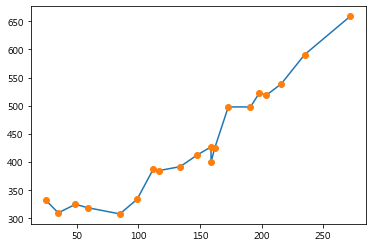

In [49]:
ds = data[idx]
x_train = ds[:,0]
y_train = ds[:,1]
plt.plot(x_train, y_train)
plt.plot(x_train, y_train, 'o')
plt.show()

In [53]:
model = Sequential()
model.add(Dense(1, input_dim=1, activation='linear'))
model.compile(optimizer='adam', loss='mse')
model.summary()
hist = model.fit(x_train, y_train, validation_split=0.2, shuffle=True,
                epochs=200, batch_size=1)



Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
16/16 [==============================] - 0s 10ms/step - loss: 122433.9283 - val_loss: 243182.0000
Epoch 2/200
16/16 [==============================] - 0s 4ms/step - loss: 122466.6994 - val_loss: 239979.6562
Epoch 3/200
16/16 [==============================] - 0s 4ms/step - loss: 122859.5386 - val_loss: 236859.3750
Epoch 4/200
16/16 [==============================] - 0s 4ms/step - loss: 133378.5836 - val_loss: 233606.7188
Epoch 5/200
16/16 [==============================] - 0s 4ms/step - loss: 115125.6521 - val_loss: 230742.5156
Epoch 6/200
16/16 [==============================] - 0s 4ms/step - loss: 115839.9991 - val_loss: 227708.2656

Epoch 72/200
16/16 [==============================] - 0s 4ms/step - loss: 60814.5616 - val_loss: 79191.1016
Epoch 73/200
16/16 [==============================] - 0s 3ms/step - loss: 55947.6939 - val_loss: 77767.8984
Epoch 74/200
16/16 [==============================] - 0s 3ms/step - loss: 58694.1889 - val_loss: 76224.7812
Epoch 75/200
16/16 [==============================] - 0s 3ms/step - loss: 55018.1425 - val_loss: 74747.3516
Epoch 76/200
16/16 [==============================] - 0s 4ms/step - loss: 52789.7916 - val_loss: 73358.8750
Epoch 77/200
16/16 [==============================] - 0s 4ms/step - loss: 57322.2417 - val_loss: 71832.3672
Epoch 78/200
16/16 [==============================] - 0s 4ms/step - loss: 51689.4922 - val_loss: 70349.6641
Epoch 79/200
16/16 [==============================] - 0s 4ms/step - loss: 57122.7376 - val_loss: 69015.5312
Epoch 80/200
16/16 [==============================] - 0s 3ms/step - loss: 59994.0880 - val_loss: 67679.0547
Epoch 81/200
16/16 [========

16/16 [==============================] - 0s 3ms/step - loss: 30376.1598 - val_loss: 10245.9668
Epoch 148/200
16/16 [==============================] - 0s 4ms/step - loss: 29613.4442 - val_loss: 9835.5020
Epoch 149/200
16/16 [==============================] - 0s 3ms/step - loss: 34455.9818 - val_loss: 9424.1973
Epoch 150/200
16/16 [==============================] - 0s 3ms/step - loss: 26681.7714 - val_loss: 9032.1777
Epoch 151/200
16/16 [==============================] - 0s 3ms/step - loss: 23596.9914 - val_loss: 8646.0605
Epoch 152/200
16/16 [==============================] - 0s 4ms/step - loss: 23126.6049 - val_loss: 8266.0645
Epoch 153/200
16/16 [==============================] - 0s 3ms/step - loss: 26817.0962 - val_loss: 7911.5010
Epoch 154/200
16/16 [==============================] - 0s 3ms/step - loss: 17742.6377 - val_loss: 7536.6138
Epoch 155/200
16/16 [==============================] - 0s 3ms/step - loss: 22107.7578 - val_loss: 7200.1748
Epoch 156/200
16/16 [====================

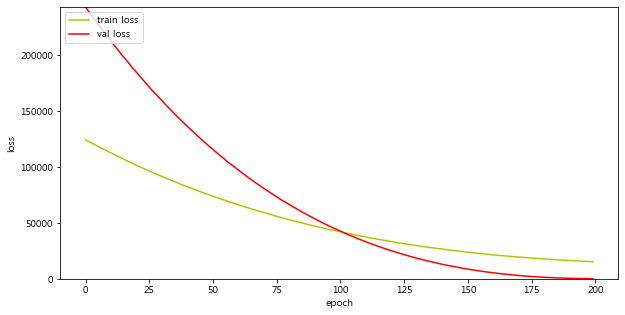

In [54]:
import matplotlib.pyplot as plt
%matplotlib inline  

fig, loss_ax = plt.subplots()
# plt.figure(figsize=(6,4)) # ERROR
fig.set_size_inches(10, 5)  # 챠트 크기 설정

# 왼쪽 y 축 설정
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_ylim([0.0, 243182.0000]) # 값을 반영하여 변경 ★

# 축 레이블 설정
loss_ax.set_xlabel('epoch')  # 학습 횟수
loss_ax.set_ylabel('loss')   # 오차

loss_ax.legend(loc='upper left') # 오차 레이블 위치

plt.show()
# train loss: 하강하면 훈련이 정상적으로 진행되고 있음
# val loss: 하강하면 훈련되지 않은 데이터를 대상으로 한 테스트도 정상적으로 진행됨.

In [59]:
# 테스트 데이터 준비, 훈련/검증에 사용하지 않은 데이터
x = np.array([50, 120, 140, 160, 250])
print(x.shape)

(5,)


In [60]:
p = model.predict(x)
print(p.shape)
print(p)

(5, 1)
[[125.34629]
 [297.33115]
 [346.4697 ]
 [395.60822]
 [616.73157]]


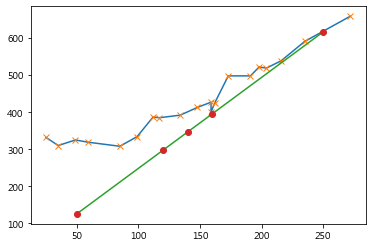

In [66]:
x_train = ds[:,0]
y_train = ds[:,1]
plt.plot(x_train, y_train)
plt.plot(x_train, y_train, 'x')
plt.plot(x, p)
plt.plot(x, p, 'o')
plt.show()

In [67]:
# 변수 1개를 가지고 매출액을 판단하는 것은 매우 특성이 부족함을 알 수 있다.
# 예) 자율 학습시간 -> 성적
# 예) 자율 학습시간 + 학원 + 온라인 강의 + 도서 구임 권수 -> 성적

In [68]:
model.save('./data/Click.h5')

In [69]:
model = load_model('./data/Click.h5')

In [70]:
pay = int(input('광고비를 입력하세요.'))
x = np.array([pay])
p = model.predict(x)
print(p)

광고비를 입력하세요.100
[[248.19261]]
